In [47]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [18]:
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
Y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 65)

In [20]:
gbc = GradientBoostingClassifier(random_state=0)

# Create the SFS object
sfs = sfs(gbc, k_features=13, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)

# Fit the SFS object on the training data
sfs.fit(X_train, y_train)

# Print the selected feature indices
print("Selected feature indices:", sfs.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.7s finished

[2023-03-25 09:34:50] Features: 1/13 -- score: 0.7522108843537415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.9s finished

[2023-03-25 09:34:52] Features: 2/13 -- score: 0.7439625850340137[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.9s finished

[2023-03-25 09:34:54] Features: 3/13 -- score: 0.7274659863945578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Selected feature indices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2023-03-25 09:35:05] Features: 13/13 -- score: 0.7352891156462584

[ 3 13  2  1  4 12 10  7 11  9  6  5  8]


Text(0, 0.5, 'Performance')

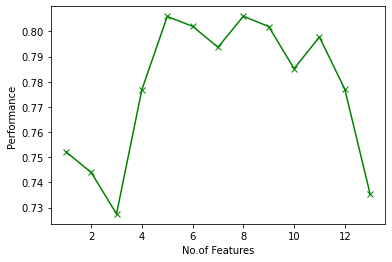

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
data = sfs.subsets_
res1 = []
a1 = np.arange(1,14)
for i in a1:
    e1 = data[i]['avg_score']
    res1.append(e1)
f1 = np.argsort(res1)
f1 = f1 + 1
print(f1)
plt.plot(a1,res1, color='green', marker='x', label='line with select markers')
plt.xlabel("No.of Features")
plt.ylabel("Performance")

In [22]:
data


{1: {'feature_idx': (2,),
  'cv_scores': array([0.73469388, 0.73469388, 0.8125    , 0.77083333, 0.70833333]),
  'avg_score': 0.7522108843537415,
  'feature_names': ('cp',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.73469388, 0.71428571, 0.8125    , 0.77083333, 0.6875    ]),
  'avg_score': 0.7439625850340137,
  'feature_names': ('cp', 'restecg')},
 3: {'feature_idx': (1, 2, 6),
  'cv_scores': array([0.65306122, 0.75510204, 0.75      , 0.77083333, 0.70833333]),
  'avg_score': 0.7274659863945578,
  'feature_names': ('sex', 'cp', 'restecg')},
 4: {'feature_idx': (1, 2, 6, 10),
  'cv_scores': array([0.79591837, 0.75510204, 0.79166667, 0.79166667, 0.75      ]),
  'avg_score': 0.7768707482993197,
  'feature_names': ('sex', 'cp', 'restecg', 'slope')},
 5: {'feature_idx': (1, 2, 6, 10, 11),
  'cv_scores': array([0.73469388, 0.83673469, 0.79166667, 0.875     , 0.79166667]),
  'avg_score': 0.805952380952381,
  'feature_names': ('sex', 'cp', 'restecg', 'slope', 'ca')},
 6: {'feature_idx

In [38]:
newdf = df[['sex',
   'cp',
   'fbs',
   'restecg',
   'exang',
   'slope',
   'ca',
   'thal','target']]
Y = newdf['target']
X = newdf.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 65)

In [28]:
!pip install bayesian-optimization


  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


ImportError: cannot import name 'just_fix_windows_console' from 'colorama' (C:\Users\H A R I H A R A N\anaconda3\lib\site-packages\colorama\__init__.py)

In [39]:
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.arange(100,1100),
    "max_features":['log2','sqrt'],
    'max_depth': np.arange(600,1000),
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,1],
    'min_samples_split' : np.arange(0.1,1)
    
}
clf = GradientBoostingClassifier(random_state=135)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X_train, y_train)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('learning_rate', 0.2), ('max_depth', 664), ('max_features', 'log2'), ('min_samples_split', 0.1), ('n_estimators', 476)])
Accuracy:0.7934670781893004


0.9016393442622951


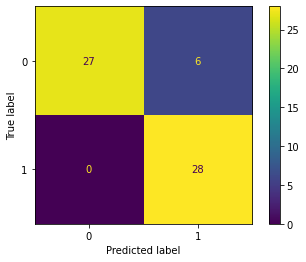

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 66)
gbc = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 664, max_features = 'log2', min_samples_split = 0.1, 
                                    n_estimators = 476)
gbc.fit(X_train, y_train)
print(gbc.score(X_test, y_test))
y_pred = gbc.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [70]:
print(y_pred)

[1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1]
